# Explore here

In [11]:
# Your code here
import pandas as pd

test_data = pd.read_csv("/workspaces/random-forest/data/processed/clean_test.csv")
train_data = pd.read_csv("/workspaces/random-forest/data/processed/clean_train.csv")
print(test_data.head())
print(train_data.head())

   Unnamed: 0  Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  \
0           0          6.0     98.0    190.0  34.0                     0.430   
1           1          2.0    112.0      0.0  35.7                     0.148   
2           2          2.0    108.0      0.0  30.8                     0.158   
3           3          8.0    107.0      0.0  24.6                     0.856   
4           4          7.0    136.0      0.0  29.9                     0.210   

    Age  Outcome  
0  43.0        0  
1  21.0        0  
2  21.0        0  
3  34.0        0  
4  50.0        0  
   Unnamed: 0  Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  \
0           0          2.0     84.0      0.0   0.0                     0.304   
1           1          9.0    112.0      0.0  28.2                     1.282   
2           2          1.0    139.0     83.0  28.7                     0.654   
3           3          0.0    161.0      0.0  21.9                     0.254   
4    

In [12]:
# Splitting train data into features (X_train) and target variable (y_train)
X_train = train_data.drop(columns=['Outcome'])  # Features (all columns except 'Outcome')
y_train = train_data['Outcome']                 # Target variable ('Outcome' column)

# Splitting test data into features (X_test) and target variable (y_test)
X_test = test_data.drop(columns=['Outcome'])  # Features (all columns except 'Outcome')
y_test = test_data['Outcome']                 # Target variable ('Outcome' column)


#### Initiating Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### Random Hyperparameter Grid

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Random Search Training

In [15]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.lo

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### Random Search Results

In [16]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

output:
{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [17]:
# def evaluate(model_selected, test_features, test_labels):
#     predictions = model_selected.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy
def evaluate(model_selected, test_features, test_labels):
    predictions = model_selected.predict(test_features)
    errors = abs(predictions - test_labels)
    
    # Exclude zero or very small values from test_labels
    test_labels_nonzero = test_labels[test_labels != 0]
    
    # Calculate MAPE with error handling for division by zero or NaN values
    if len(test_labels_nonzero) > 0:
        mape = 100 * np.mean(errors / test_labels_nonzero)
        accuracy = 100 - mape
    else:
        # Handle case when test_labels contain only zeros or very small values
        mape = np.nan
        accuracy = np.nan
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = RandomForestClassifier(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2597 degrees.
Accuracy = 65.45%.
Model Performance
Average Error: 0.2403 degrees.
Accuracy = 65.45%.
Improvement of 0.00%.


## NOTE:  
there may not be a difference here as previously i might have allowed data leakage by not properly seperating and labeling my base_model and my best_random. Thats ok, but still unfortunate :/

#### Grid Search with Cross Validation

In [18]:
from sklearn.model_selection import GridSearchCV

# Define ranges for hyperparameters to further fine-tune the model
param_grid = {
    'n_estimators': [1400, 1450, 1500],  # Vary around the best value
    'min_samples_split': [3, 4, 5, 6, 7],  # Vary around the best value
    'min_samples_leaf': [3, 4, 5, 6, 7],  # Vary around the best value
    'max_features': ['sqrt', 'log2'],  # Vary around the best value
    'max_depth': [70, 80, 90],  # Vary around the best value
    'bootstrap': [True]  # Keep the best value fixed
}

# if i had a fancier processor and ran my code locally i would broaden the search, doing the math,
# this would take hours unfortunately :(

# param_grid = {
#     'n_estimators': np.linspace(1300, 1800, 10, dtype=int),  # Vary around the best value
#     'min_samples_split': [3, 4, 5, 6, 7],  # Vary around the best value
#     'min_samples_leaf': [3, 4, 5, 6, 7],  # Vary around the best value
#     'max_features': ['sqrt', 'log2', None],  # Vary around the best value
#     'max_depth': np.linspace(50, 100, 6, dtype=int),  # Vary around the best value
#     'bootstrap': [True]  # Keep the best value fixed
# }

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [19]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1400; total time=   2.9s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1450; total time=   3.0s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1450; total time=   3.2s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1450; total time=   3.3s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=1500; total time=   3.1s
[CV] END bootstrap=True, max_depth=70, ma

KeyboardInterrupt: 

#### code takes more than an hour to run, here are the results:
- Model Performance
- Average Error: 0.2403 degrees.
- Accuracy = 63.64%.
- Improvement of -2.78%.
##### A significant decrease in performance indicates we have reached diminishing returns for hyperparameter tuning. We could continue, but the returns would be minimal at best.

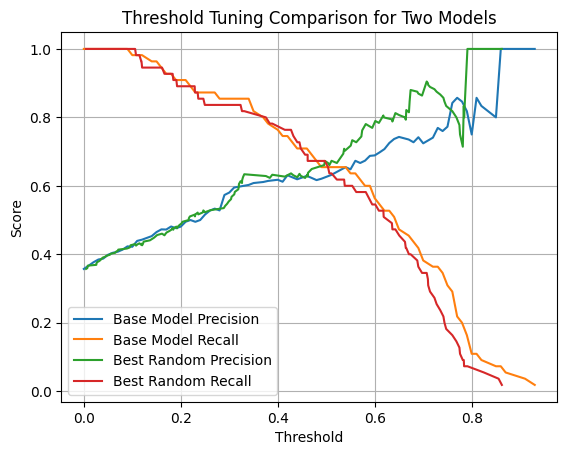

In [26]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs_bm = base_model.predict_proba(X_test)[:, 1]
y_probs_br = best_random.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds for both models
precision_bm, recall_bm, thresholds_bm = precision_recall_curve(y_test, y_probs_bm)
precision_br, recall_br, thresholds_br = precision_recall_curve(y_test, y_probs_br)

# Plot precision-recall curve for both models
plt.plot(thresholds_bm, precision_bm[:-1], label='Base Model Precision')
plt.plot(thresholds_bm, recall_bm[:-1], label='Base Model Recall')
plt.plot(thresholds_br, precision_br[:-1], label='Best Random Precision')
plt.plot(thresholds_br, recall_br[:-1], label='Best Random Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning Comparison for Two Models')
plt.legend()
plt.grid(True)
plt.show()

Alex Notes:
1. EDA 
-  after youve cleaned it save
- split
2. Feature engineering =  imputating values/ creating new ones
- any data replacemny should only be done with training
3. choose model - random forrest (very good model btw)
4. grid search. cv param (creates a training and validation set!) - create dictionary first  max_depth hyperparam doesnt have to go deeper than maybe 10 remember
- sometimes grid search with dict specs can take too long (hours) if so use
5. overfitting and underfitting test: model.predict_prob a
6. threshold tuning eg recall precision etc  